In [2]:
import numpy as np
import matplotlib.pylab as plt
from __future__ import division

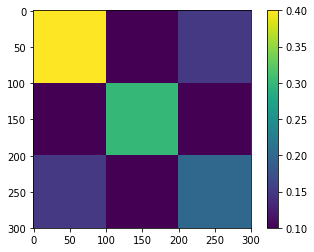

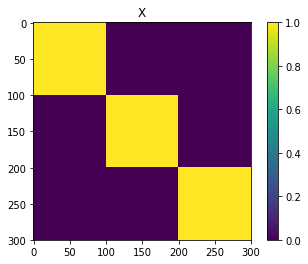

In [3]:
# Psi=np.asarray([
#     [.670,.072,.020,.023,.186,.187],
#     [.072,.570,.021,.016,.360,.107],
#     [.020,.021,.555,.048,.311,.188],
#     [.023,.016,.048,.494,.081,.137],
#     [.186,.360,.311,.081,.475,.031],
#     [.187,.107,.188,.137,.031,.395],
# ])
# Z_gt=np.asarray([1,0,0,0,0,0]*10+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*5+[0,0,0,1,0,0]*20+[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10).reshape(65,6)
# Z_gt=np.asarray([1,0,0,0,0,0]*10+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*10+[0,0,0,1,0,0]*10+[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10).reshape(60,6)

Psi=np.asarray([
    [.4,.1,.15],
    [.1,.3,.1],
    [.15,.1,.2]
])

# Psi=np.asarray([
#     [.790,.072,.553],
#     [.072,.520,.190],
#     [.553,.190,.670]
# ])
n1=100
Z_gt=np.asarray([1,0,0]*n1+[0,1,0]*n1+[0,0,1]*n1).reshape(n1*3,3)
Mz=Z_gt.dot(Psi).dot(Z_gt.T)
plt.figure(1)
plt.imshow(Mz)
plt.colorbar()
plt.show()

X_gt=Z_gt.dot(Z_gt.T)

plt.figure(2)
plt.title('X')
plt.imshow(X_gt)
plt.colorbar()

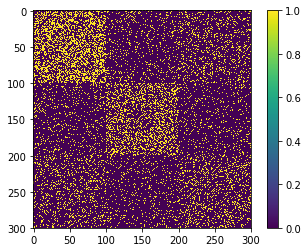

In [4]:
A=np.random.binomial(1,Mz)
# A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))+np.eye(A.shape[0])
A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
# A=np.triu(A)+np.triu(A).T-1*np.diag(np.diag(A))
lamb=2/(A.shape[0]*(A.shape[0]-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))
plt.figure(2)
plt.imshow(A)
plt.colorbar()
plt.show()

In [5]:
def proj_A(X):
    n=X.shape[0]
    temp1=np.append((X-np.diag(np.diag(X))).dot(np.ones(n))*2,np.diag(X))-b
    mu1,nu1=temp1[:n],temp1[n:]
    temp2=np.append(1/(2*(n-2))*(mu1-np.ones(n)*(np.sum(mu1)/(2*n-2))),nu1)
    mu2,nu2=temp2[:n],temp2[n:]
    temp=np.outer(mu2,np.ones(n))
    res=X-((temp+temp.T-2*np.diag(mu2))+np.diag(nu2))
    return res

def proj_psd(X):
    w,v=np.linalg.eig((X+X.T)/2)
    idx=(w>=0)
    res=v[:,idx].dot(np.diag(w[idx])).dot(v[:,idx].T)
    return res

# 

def proj_simplex(v, s=1):
    n = v.shape[0]
    if v.sum() == s and np.alltrue(v >= 0):
        return v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - s))[0][-1]
    theta = float(cssv[rho] - s) / rho
    w = (v - theta).clip(min=0)
    return w

def proj_l1(v, s=1):
    n = v.shape[0]
    u = np.abs(v)
    if u.sum() <= s:
        return v
    w = proj_simplex(u, s=s)
    w *= np.sign(v)
    return w

def proj_1inf(Y,lamb):
    res=np.zeros((Y.shape))
    for i in range(Y.shape[0]):
        res[i,:]=Y[i,:]-proj_l1(Y[i,:],lamb)
    return res    

# SDP1

0 -iter
1138.6889914482176


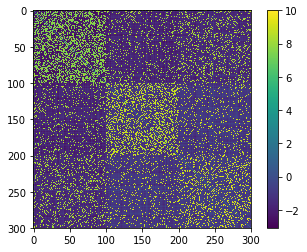

100 -iter
1.123787414730923


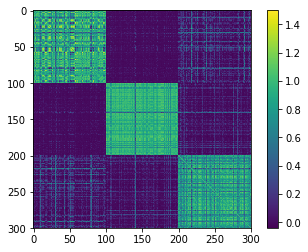

200 -iter
0.14183942115018056


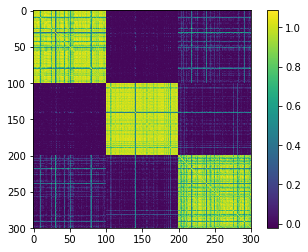

300 -iter
0.06557709552212972


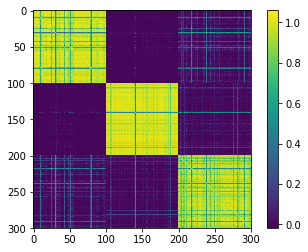

400 -iter
0.028632682316520164


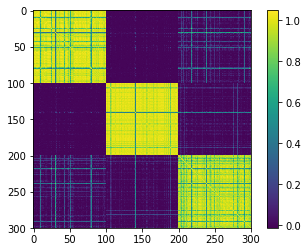

499 -iter(last)
0.019001069929476547


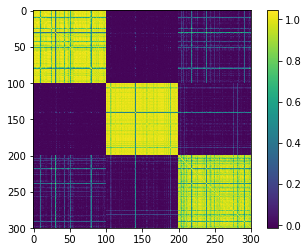

In [7]:
n,K=Z_gt.shape
b=np.append(np.ones(n)*2*(n/K-1),np.ones(n))
max_iter=int(5e2)
X=np.zeros((A.shape[0],A.shape[1]))
Y=np.zeros((A.shape[0],A.shape[1]))
Z=np.zeros((A.shape[0],A.shape[1]))
U=np.zeros((A.shape[0],A.shape[1]))
V=np.zeros((A.shape[0],A.shape[1]))

# A_=A-lamb*np.ones((n,n))

rho=.05
#.05
tol=1e-3
# 1e-3
for it in range(max_iter):
    X_old=X
    X=proj_A(0.5*(Z-U+Y-V+1/rho*A))
    Z=np.maximum(0,X+U)
    Y=proj_psd(X+V)
    U=U+X-Z
    V=V+X-Y
    if(np.linalg.norm(X-X_old)<tol):
        break
    if(it%100==0):
        print(it,'-iter')
        print(np.linalg.norm(X-X_old))
        plt.figure(3)
        plt.imshow(X)
        plt.colorbar()
        plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
plt.imshow(X)
plt.colorbar()
plt.show()

# SDP-inequality

0 -iter
5.97756390551416


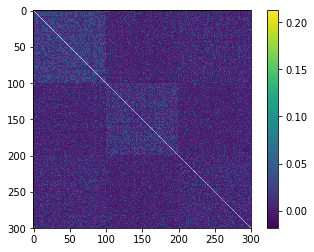

100 -iter
0.6093023464314893


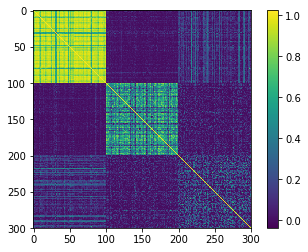

200 -iter
0.21216768907981667


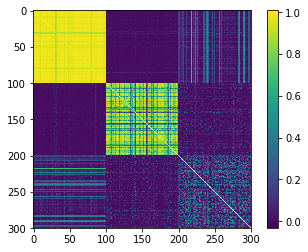

300 -iter
0.11684963268464633


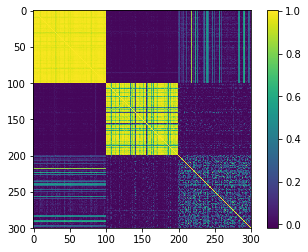

400 -iter
0.06626014563497937


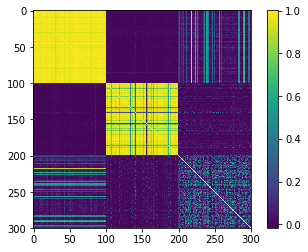

499 -iter(last)
0.03926900995106676


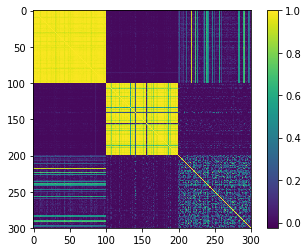

In [8]:
n,K=Z_gt.shape
b=np.ones(n)
max_iter=int(5e2)
C=-(A-lamb*np.ones((n,n)))
# -lamb1*np.ones((n,n))

X=np.zeros((A.shape[0],A.shape[1]))
S=np.zeros((A.shape[0],A.shape[1]))
Z=np.zeros((A.shape[0],A.shape[1]))
v=np.zeros(n)
y=np.zeros(n)
s=np.zeros(n)

rho=.05
tau=1.5
tol=1e-2
for it in range(max_iter):
    X_old=X
    R1=np.diag(y)+S+Z-C+X/rho
    R2=v-y+s/rho
    Z=np.minimum(np.maximum(0,rho*(R1-Z))/rho-(R1-Z),1)
    v=np.minimum(b,rho*(R2-v))/rho-(R2-v)
    y=0.5*(v+s/rho-np.diag(S+Z-C+X/rho))
    R1=np.diag(y)+S+Z-C+X/rho
    S=proj_psd(S-R1)
    X=X+tau*rho*(np.diag(y)+S+Z-C)
    s=s+tau*rho*(v-y)
    if(np.linalg.norm(X-X_old)<tol):
        break
    if(it%100==0):
        print(it,'-iter')
        print(np.linalg.norm(X-X_old))
        plt.figure(3)
        plt.imshow(X)
        plt.colorbar()
        plt.show()
print(it,'-iter(last)')
print(np.linalg.norm(X-X_old))
plt.figure(3)
plt.imshow(X)
plt.colorbar()
plt.show()
X1_opt=X

# Non-Convex (Burer-Monteiro Approach)

In [6]:
def proj_tang(u,sigma):
    return u-np.diag(np.diag(u.dot(sigma.T))).dot(sigma)

def proj_mani(sigma):
    res=sigma/np.outer(np.sqrt(np.sum(sigma**2,axis=1)),np.ones(sigma.shape[1]))
    return res

def gradf(sigma):
    return 2*(B-np.diag(np.diag(B.dot(sigma).dot(sigma.T)))).dot(sigma)

def hessf(sigma,u):
    tmp1=2*(B-np.diag(np.diag(B.dot(sigma).dot(sigma.T)))).dot(u)\
    -2*np.diag(np.diag(B.dot(sigma).dot(u.T)+B.dot(u).dot(sigma.T))).dot(sigma)
    res=proj_tang(tmp1,sigma)
    return res


0 -iter
0.022587423711237252


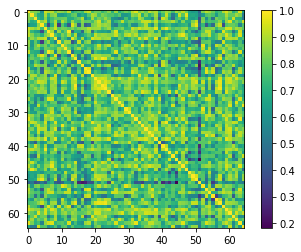

100 -iter
0.022587430530288218


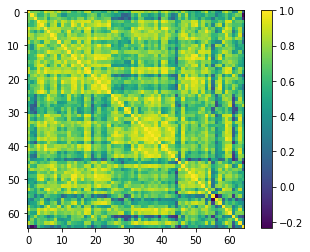

200 -iter
0.022587434500752304


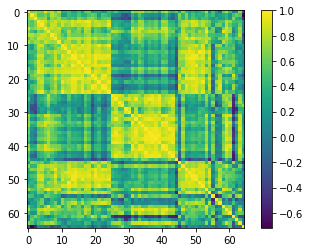

300 -iter
0.022587434743119878


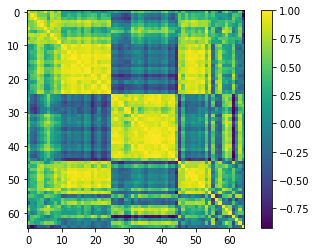

400 -iter
0.02258743662689797


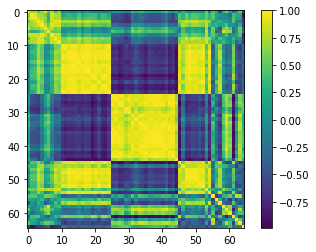

500 -iter
0.02258741621639636


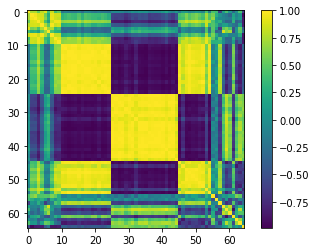

600 -iter
0.012354350260087908


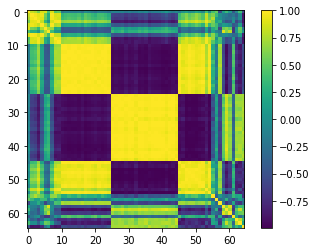

700 -iter
0.011711491948727384


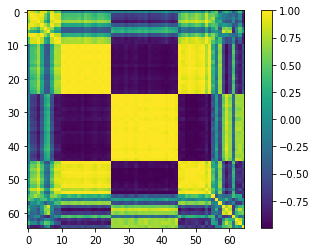

800 -iter
0.012286293776512323


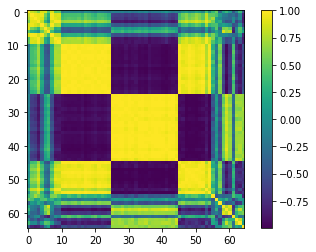

900 -iter
0.01133472788384526


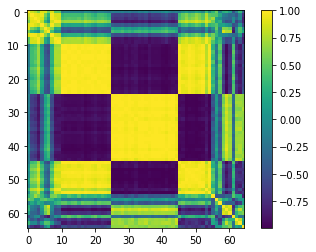

In [7]:
n=A.shape[0]
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))
B=A-lamb*np.ones((n,n))

# N_H=10*np.linalg.norm(B,ord=1)*log(n)/np.linalg.norm(hess)
N_H=200
mu_G=np.linalg.norm(B,ord=2)
mu_H=np.linalg.norm(B,ord=1)*4
eta_G=mu_G/(20*np.linalg.norm(B,ord=1))
# lamb_H=2*np.sum(u*((A-Lamb).dot(u)))
# eta_H=np.min(np.sqrt(lamb_H/(216*np.linalg.norm(A,ord=1))),lamb_H/(12*np.linalg.norm(A,ord=2)))
k=6
sigma=proj_mani(np.random.rand(n,k))
max_iter=1000

for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    if(grad_size>mu_G):
        u=grad/grad_size
        eta=eta_G
    
    # Eigen-step
    else:
        u=np.random.rand(sigma.shape[0],sigma.shape[1])
        u=proj_tang(u,sigma)
        u=u/np.linalg.norm(u)
        for i in range(N_H):
            u=hessf(sigma,u)+mu_H*u
            u=u/np.linalg.norm(u)
        if(np.sum(u*grad)<0): u=-u
        Lamb=np.diag(np.diag(B.dot(sigma).dot(sigma.T)))
        lamb_H=2*np.sum(u*((B-Lamb).dot(u)))
        eta_H=np.minimum(np.sqrt(lamb_H/(216*np.linalg.norm(B,ord=1))),lamb_H/(12*np.linalg.norm(B,ord=2)))
        eta=eta_H
    
    # update sigma
    sigma=sigma+eta*u
    sigma=proj_mani(sigma)
    
    if(it%100==0):
        print(it,'-iter')
        print(np.linalg.norm(sigma-sigma_old))
        plt.figure(3)
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
